In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the datasets module from scikit-learn to load the iris dataset.

  a) Check keys on the loaded data and check what the different values for each key are.

  b) Now insert the data into a DataFrame.

  c) Do some EDA to get an understanding of the dataset.

  d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

  e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot.

  f) Now remove the outliers in data. (**)

    Lower bound outlier: Q 1 − 1.5 ⋅ I Q R
    Upper bound outlier: Q 3 + 1.5 ⋅ I Q R

where Q 1 is the 1st quartile or 25 percentile, Q 3 is the 3rd quartile or 75 percentile and I Q R = Q 3 − Q 1 is the interquartile range.

  g) Do train|test split on the dataset and then scale it with feature standardization.

  h) Classify using logistic regression

  i) Classify the first 10 values of your X t e s t and compare it manually with your labels.

  j) Evaluate your model using classification report and confusion matrix.

In [1]:

#   a) Check keys on the loaded data and check what the different values for each key are.

from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()
# iris["feature_names"]
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
#   b) Now insert the data into a DataFrame.
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris.target
df["target_names"] = df["target"].map(dict(enumerate(iris.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
#   c) Do some EDA to get an understanding of the dataset.
df.shape, df.columns

((150, 6),
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)', 'target', 'target_names'],
       dtype='object'))

In [4]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


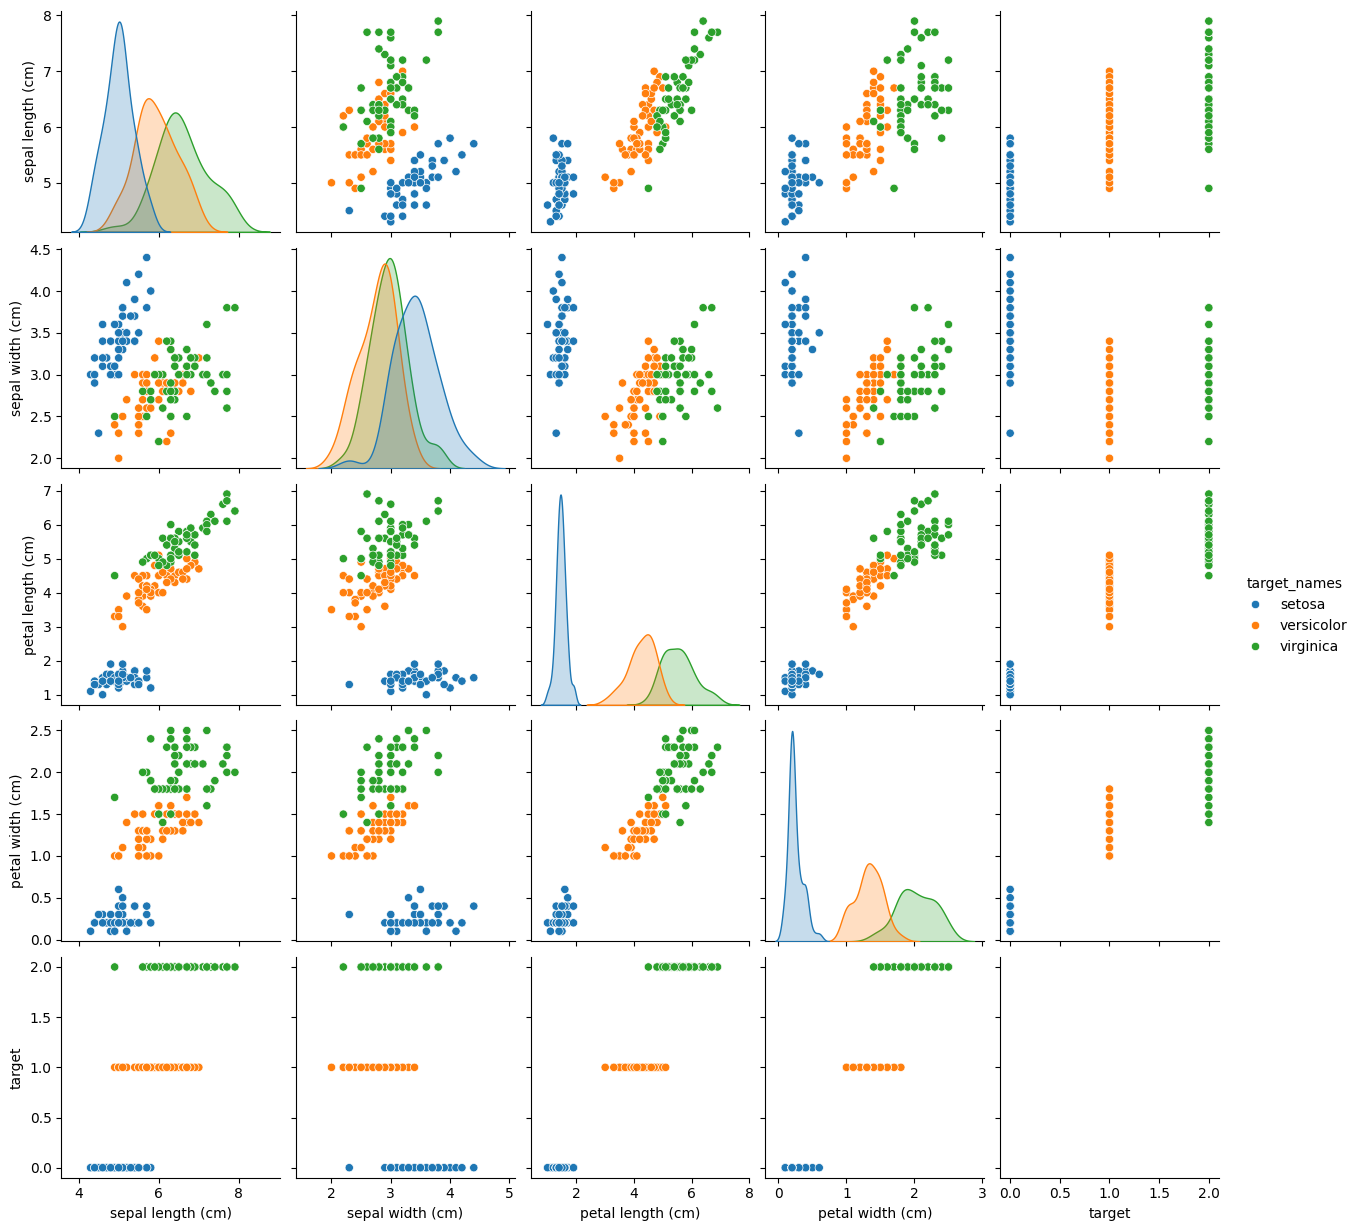

In [5]:
import seaborn as sns
sns.pairplot(df, hue="target_names")

<Axes: >

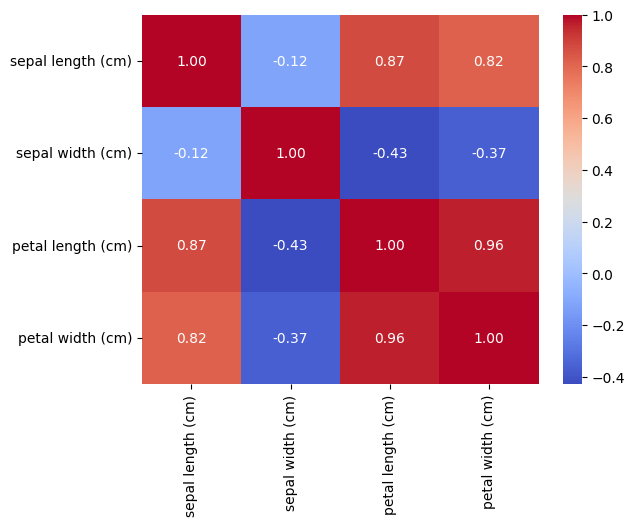

In [6]:

#   d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

sns.heatmap(data=df.drop(columns=["target","target_names"], axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")

In [7]:
# df.drop(columns="target", inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: >

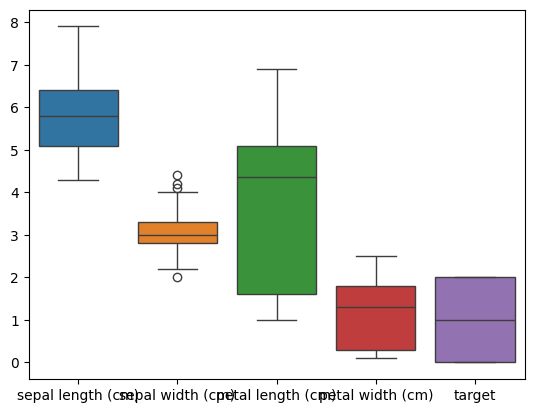

In [8]:

#   e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot.
sns.boxplot(data=df)


<Axes: >

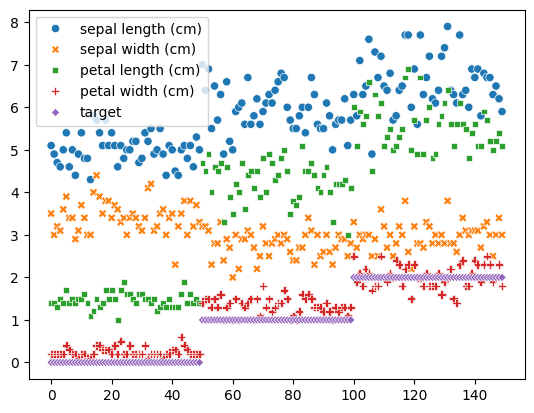

In [9]:
sns.scatterplot(df)

In [10]:

#   f) Now remove the outliers in data. (**)

#     Lower bound outlier: Q 1 − 1.5 ⋅ I Q R
#     Upper bound outlier: Q 3 + 1.5 ⋅ I Q R

# where Q 1 is the 1st quartile or 25 percentile, Q 3 is the 3rd quartile or 75 percentile and I Q R = Q 3 − Q 1 is the interquartile range.
Q1 = 2.8
Q3 = 3.3
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR) 
df = df[(df["sepal width (cm)"] > lower_bound) & (df["sepal width (cm)"] < upper_bound)]
lower_bound,upper_bound
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
 4   target             146 non-null    int64  
 5   target_names       146 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


<Axes: >

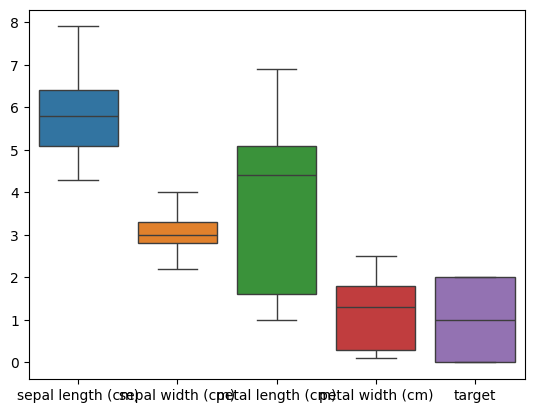

In [11]:
sns.boxplot(data=df)


In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
# # dummy encoding
# df_dummies = (pd.get_dummies(df, drop_first=True)*1)
# df_dummies

In [14]:
#   g) Do train|test split on the dataset 
X, y = df.drop(columns=["target", "target_names"]), df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((97, 4), (97,), (49, 4), (49,))

In [17]:
# and then scale it with feature standardization.
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [18]:

#   h) Classify using logistic regression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
y_pred_proba = model.predict_proba(scaled_X_test)


In [19]:

#   i) Classify the first 10 values of your X_test and compare it manually with your labels.
y_pred[:10] - y_test[:10] # den predictade fel på index 70


48     0
101    0
28     0
20     0
45     0
124    0
30     0
84     0
70     1
19     0
Name: target, dtype: int64

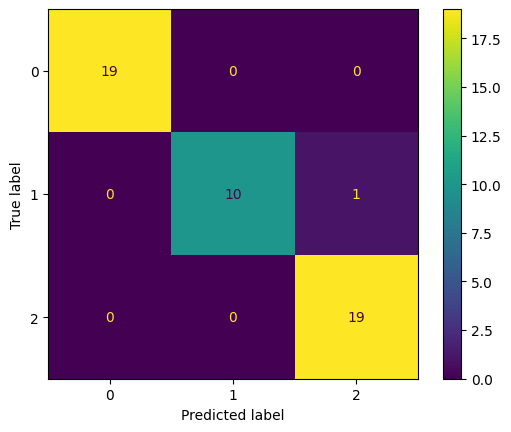

In [20]:

#   j) Evaluate your model using classification report and confusion matrix.

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.91      0.95        11
           2       0.95      1.00      0.97        19

    accuracy                           0.98        49
   macro avg       0.98      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



## prediction with random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.91      0.91        11
           2       0.95      0.95      0.95        19

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



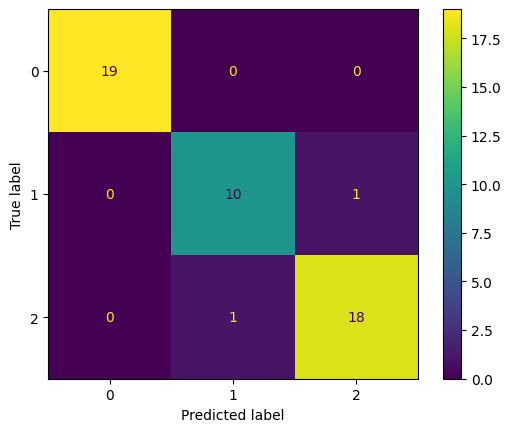

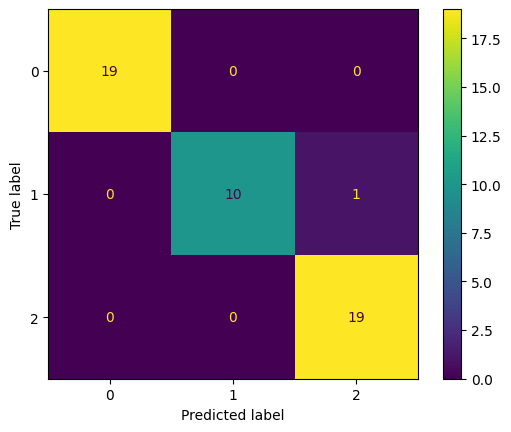

In [30]:
print(classification_report(y_test, y_pred))
cm_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_rf).plot();
ConfusionMatrixDisplay(cm).plot();